In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

In [171]:
data = pd.read_csv('/home/pydev/workflow/dt_learn_data_science/public_projects/linear_regression/employee_salary/Salarys.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [172]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [174]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [175]:
# by day
figure = px.scatter(
    data_frame=data, x="Salary", y="YearsExperience",  trendline="ols"
)
figure.show()

In [176]:
X = data.drop('Salary', axis=1)
y = data["Salary"]

In [177]:
X.shape, y.shape

((35, 1), (35,))

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=101, test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((28, 1), (7, 1), (28,), (7,))

In [179]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [180]:
model.score(X_test, Y_test)

0.9785870620257094

In [181]:
prediction = model.predict(X_test)
prediction

array([ 80430.70927962,  56616.04598277,  88368.93037856, 147464.57633739,
       127178.01130675, 112183.5936754 , 107773.47084266])

In [182]:
Y_test

18     81363
7      54445
20     91738
34    139465
30    127345
26    116969
25    105582
Name: Salary, dtype: int64

In [183]:
Y_test.shape, prediction.shape

((7,), (7,))

In [184]:
diff = Y_test - prediction

In [185]:
pd.DataFrame(np.c_[Y_test, prediction, diff], columns=['Actual', 'Predicted', 'Difference'])

,Actual,Predicted,Difference
0,81363.0,80430.709280,932.290720
1,54445.0,56616.045983,-2171.045983
2,91738.0,88368.930379,3369.069621
3,139465.0,147464.576337,-7999.576337
4,127345.0,127178.011307,166.988693
5,116969.0,112183.593675,4785.406325
6,105582.0,107773.470843,-2191.470843


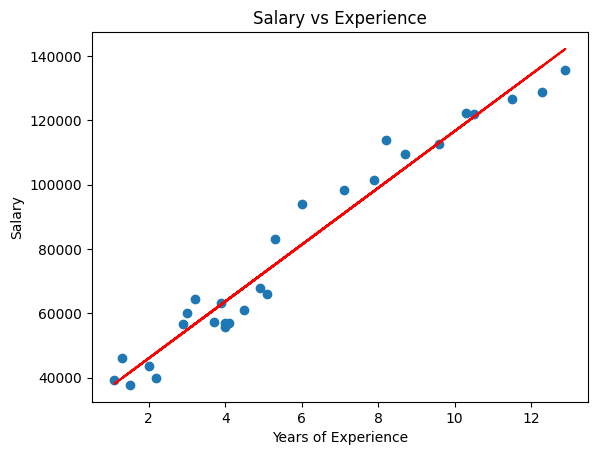

In [186]:
# Visualize Model, that how it is performing on training data
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

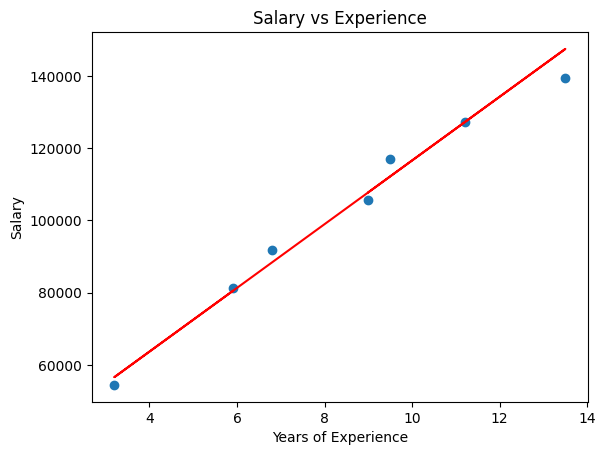

In [187]:
# Visualize Model, that how it is performing on testing data
plt.scatter(X_test, Y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [188]:
model.score(X_test , Y_test)

0.9785870620257094

In [189]:
rmse = np.sqrt(mean_squared_error(Y_test,prediction))
r2 = r2_score(Y_test,prediction)

rmse, r2

(3939.851369710113, 0.9785870620257094)

In [190]:
model.intercept_

28391.25985318436

In [191]:
model.coef_

array([8820.2456655])

In [192]:
def calc(slope, intercept, to_predict):
    return slope * to_predict + intercept

In [193]:
score = calc(model.coef_, model.intercept_, 3)
print(score) 

[54851.99684967]


In [194]:
score = calc(model.coef_, model.intercept_, 5)
print(score) 

[72492.48818067]


In [195]:
# exp = 3
# model.predict([[exp]])[0]
# print(f"Salary of {exp} year experience employee = {int(model.predict([[exp]])[0])} thousands")